In [77]:
def readFile(path):
    with open(path) as f:
        captions=f.read()
    return captions

In [78]:
captions=readFile("flickr8k/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt")

In [79]:
captions=captions.split("\n")[:-1]


In [80]:
print(len(captions))

40460


In [81]:
import re

In [82]:
def cleanSentence(sentence):
    sentence=sentence.lower()
    sentence=re.sub(r"[^a-z]+"," ",sentence)
    sentence=sentence.split()
    sentence=[i for i in sentence if len(i)>1]
    sentence=" ".join(sentence)
    return sentence

In [83]:
description={}
for caption in captions:
    img_name=caption.split("\t")[0].split(".")[0]
    sent=cleanSentence(caption.split("\t")[1])
    if description.get(img_name) is None:
        description[img_name]=[]
    description[img_name].append(sent)

In [84]:
description.get("1000268201_693b08cb0e")

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [85]:
tot_word=[]
for key in description.keys():
    [tot_word.append(i) for des in description[key] for i in des.split()]

In [86]:
print(len(tot_word))

373837


In [87]:
import collections

In [88]:
freq_cnt=collections.Counter(tot_word)
freq_cnt=dict(freq_cnt)

In [89]:
#remove less frequent words from vocabulary
sorted_freq_count=sorted(freq_cnt.items(),reverse=True,key= lambda x:x[1])
threshold=10
sorted_freq_count=[x for x in sorted_freq_count if x[1]>threshold]
tot_word=[x[0] for x in sorted_freq_count]

In [90]:
print(len(tot_word))

1845


In [91]:
train=readFile("./flickr8k/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt")
test=readFile("./flickr8k/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.testImages.txt")

In [92]:
train=[i.split(".")[0] for i in train.split("\n")[:-1]]
test=[i.split(".")[0] for i in test.split("\n")[:-1]]

In [93]:

train[:10]

['2513260012_03d33305cf',
 '2903617548_d3e38d7f88',
 '3338291921_fe7ae0c8f8',
 '488416045_1c6d903fe0',
 '2644326817_8f45080b87',
 '218342358_1755a9cce1',
 '2501968935_02f2cd8079',
 '2699342860_5288e203ea',
 '2638369467_8fc251595b',
 '2926786902_815a99a154']

In [94]:
train_descriptions={}
for img_id in train:
    train_descriptions[img_id]=[]
    for sentence in description[img_id]:
        train_descriptions[img_id].append("startseq "+sentence+" endseq")

In [95]:
train_descriptions["2513260012_03d33305cf"]

['startseq black dog is running after white dog in the snow endseq',
 'startseq black dog chasing brown dog through snow endseq',
 'startseq two dogs chase each other across the snowy ground endseq',
 'startseq two dogs play together in the snow endseq',
 'startseq two dogs running through low lying body of water endseq']

In [96]:

from keras.applications.resnet50 import ResNet50
import numpy as np

In [97]:
model=ResNet50(weights='imagenet',input_shape=(224,224,3))

In [98]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [99]:

from keras.models import *
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image


In [100]:
model_new=Model(model.input,model.layers[-2].output)

In [101]:
def preprocessImage(img):
    img=image.load_img(img,target_size=(224,224,3))
    img=image.img_to_array(img)
    img=img.reshape(-1,224,224,3)
    img=preprocess_input(img)
    return img

In [102]:
def encodeImage(img):
    img=preprocessImage(img)
    img=model_new.predict(img)
    img=img.reshape((-1))
    return img

In [107]:

IMG_PATH="./flickr8k/Flickr_Data/Flickr_Data/Images/"

In [108]:
encodeImage(IMG_PATH+"2699342860_5288e203ea.jpg").shape


(2048,)

In [105]:
train_encodings={}
for ix,img_id in enumerate(train):
    img_path="{}/{}.jpg".format(IMG_PATH,img_id)
    train_encodings[img_id]=encodeImage(img_path)
    if ix%100==0:
        print("encoding image {}/{}".format(ix,len(train)))

encoding image 0/6000
encoding image 100/6000
encoding image 200/6000
encoding image 300/6000
encoding image 400/6000
encoding image 500/6000
encoding image 600/6000
encoding image 700/6000
encoding image 800/6000
encoding image 900/6000
encoding image 1000/6000
encoding image 1100/6000
encoding image 1200/6000
encoding image 1300/6000
encoding image 1400/6000
encoding image 1500/6000
encoding image 1600/6000
encoding image 1700/6000
encoding image 1800/6000
encoding image 1900/6000
encoding image 2000/6000
encoding image 2100/6000
encoding image 2200/6000
encoding image 2300/6000
encoding image 2400/6000
encoding image 2500/6000
encoding image 2600/6000
encoding image 2700/6000
encoding image 2800/6000
encoding image 2900/6000
encoding image 3000/6000
encoding image 3100/6000
encoding image 3200/6000
encoding image 3300/6000
encoding image 3400/6000
encoding image 3500/6000
encoding image 3600/6000
encoding image 3700/6000
encoding image 3800/6000
encoding image 3900/6000
encoding ima

In [109]:
import pickle

In [110]:

with open("train_encodings.pkl","wb") as f:
    pickle.dump(train_encodings,f)

In [111]:
test_encodings={}
for i,img_id in enumerate(test):
    img_path="{}/{}.jpg".format(IMG_PATH,img_id)
    test_encodings[img_id]=encodeImage(img_path)
    if i%100==0:
        print("encoding image {}/{}".format(i,len(test)))

encoding image 0/1000
encoding image 100/1000
encoding image 200/1000
encoding image 300/1000
encoding image 400/1000
encoding image 500/1000
encoding image 600/1000
encoding image 700/1000
encoding image 800/1000
encoding image 900/1000


In [112]:
with open("test_encodings.pkl","wb") as f:
    pickle.dump(test_encodings,f)

In [113]:
word_2_index={}
index_2_word={}
tot_word.append('startseq')
tot_word.append('endseq')

In [114]:
vocab_size=len(tot_word)+1
print(vocab_size)

1848


In [115]:
for i,word in enumerate(tot_word):
    word_2_index[word]=(i+1)
    index_2_word[i+1]=word

In [116]:
print(word_2_index["beautiful"],index_2_word[668])

668 beautiful


In [117]:
#find maximum length of a sentence 
maxlen=0
for key in train_descriptions.keys():
    for sentence in train_descriptions[key]:
        maxlen=max(maxlen,len(sentence.split()))
print(maxlen)

35


In [118]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [119]:
def data_generator(train_descriptions,train_encodings,word_2_index,max_len,batch_size):
    X1,X2,y=[],[],[]
    n=0
    while True:
        for key,desc_list in train_descriptions.items():
            n+=1
            photo=train_encodings[key]
            for desc in desc_list:
                seq=[word_2_index[word] for word in desc.split() if word in word_2_index]
                for i in range(1,len(seq)):
                    xi=seq[:i]
                    yi=seq[i]
                    xi=pad_sequences([xi],maxlen=max_len,value=0,padding='post')[0]
                    yi=to_categorical([yi],num_classes=vocab_size)[0]
                    X1.append(photo)
                    X2.append(xi)
                    y.append(yi)
            if n==batch_size:
                yield [[np.array(X1),np.array(X2)],np.array(y)]
                X1,X2,y=[],[],[]
                n=0

In [120]:
f= open("./glove.6B.50d.txt",encoding='utf8')

In [121]:
embedding_index={}
for line in f:
    values=line.split()
    word=values[0]
    embeddings=np.array(values[1:],dtype='float32')
    embedding_index[word]=embeddings

In [122]:
def getEmbeddings():
    emb_dim=50
    matrix=np.zeros((vocab_size,emb_dim))
    for idx,word in index_2_word.items():
        embedding_vector=embedding_index.get(word)
        if embedding_vector is not None:
            matrix[idx]=embedding_vector
    return matrix

In [123]:
embedding_matrix=getEmbeddings()
print(embedding_matrix.shape)

(1848, 50)


In [124]:
from keras.layers import *

In [125]:
input_img=Input(shape=(2048,))
input_img1=Dropout(0.4)(input_img)
input_img2=Dense(256,activation='relu')(input_img1)

In [126]:
input_cap=Input(shape=(maxlen,))
input_cap1=Embedding(input_dim=vocab_size,output_dim=50,mask_zero=True)(input_cap)
input_cap2=Dropout(0.4)(input_cap1)
input_cap3=LSTM(256)(input_cap2)

In [127]:
decoder1=add([input_img2,input_cap3])
decoder2=Dense(256,activation='relu')(decoder1)
outputs=Dense(vocab_size,activation='softmax')(decoder2)

In [128]:

model=Model(inputs=[input_img,input_cap],outputs=outputs)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 35, 50)       92400       input_6[0][0]                    
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 2048)         0           input_5[0][0]                    
____________________________________________________________________________________________

In [129]:
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable=False

In [130]:
model.compile(loss='categorical_crossentropy',optimizer='adam')

In [131]:
epochs=20
batch_size=3
steps_per_epoch=len(train)//batch_size

In [132]:
def train():
    for i in range(epochs):
        generator=data_generator(train_descriptions,train_encodings,word_2_index,maxlen,batch_size)
        model.fit_generator(generator,steps_per_epoch=steps_per_epoch)
        model.save('./model_weights/model_'+str(i)+'.h5')

In [133]:
model.load_weights("./model_9.h5")
                 

In [135]:

def predictCaption(img):
    in_text="startseq"
    img=img.reshape(1,-1)
    for i in range(maxlen):
        sequence=[word_2_index[i] for i in in_text.split() if i in word_2_index]
        sequence=pad_sequences([sequence],value=0,maxlen=maxlen,padding='post')
        ypred=model.predict([img,sequence])
        ypred=ypred.argmax()
        word=index_2_word[ypred]
        in_text+=(" "+word)
        if word=='endseq':
            break
    final_caption=in_text.split()[1:-1]
    final_caption=" ".join(final_caption)
    return final_caption


In [136]:
test_data=[]
for name,encodings in test_encodings.items():
    test_data.append((name,encodings))

In [137]:
import matplotlib.pyplot as plt

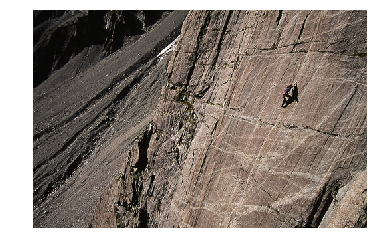

man in red shirt is climbing rock face


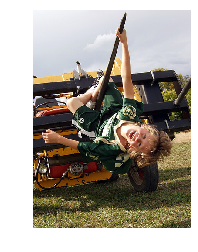

boy in blue shirt and blue jeans is jumping on the grass


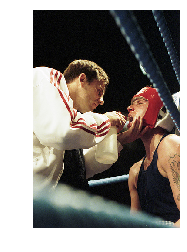

woman in blue shirt and blue shorts is standing in front of crowd


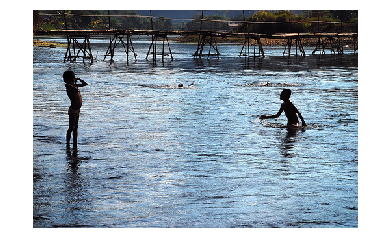

man is in the water


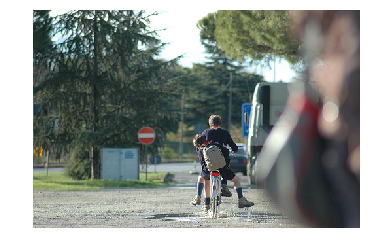

man in hat and black helmet is riding bike on the street


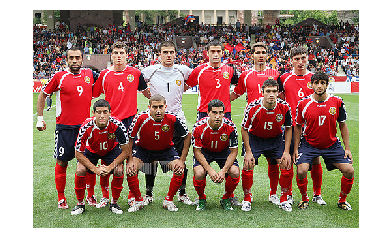

crowd of people are playing rugby game


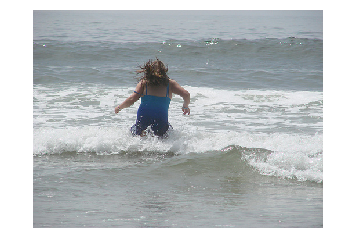

young girl in blue bathing suit is running on the beach


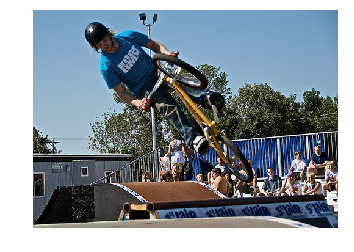

man in green shirt is jumping into the air


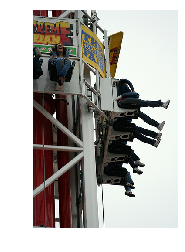

man in red shirt is sitting on the edge of the ice


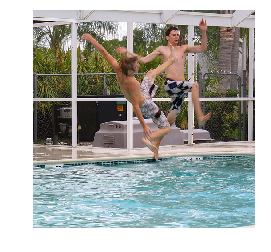

girl jumps into pool


In [138]:

for i in range(10):
    no=np.random.randint(0,1000)
    name=test_data[no][0]
    encoding=test_data[no][1]
    caption=predictCaption(encoding)
    img=image.load_img("./flickr8k/Flickr_Data/Flickr_Data/Images/{}.jpg".format(name))
    img=image.img_to_array(img)/255.0
    plt.axis("off")
    plt.imshow(img)
    plt.show()
    print(caption)